In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import seaborn as sns

In [3]:
Data = pd.read_csv('../Cluster1Mondayn.csv', index_col='Time', parse_dates=True)

In [4]:
data = Data.drop(['dayofyear', 'month', 'dayofweek', 'hourofday', 'minuteofday', 'daytype', 'season'], axis=1)

In [5]:
def split_sequence(sequence, n_steps):
    X, Y = list(), list()
    for i in range(len(sequence)):
        
        end_ix = i + n_steps
        
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x) 
        Y.append(seq_y)
    return np.array(X), np.array(Y)

n_steps = 3
X, Y = split_sequence(data.values, n_steps)

In [6]:
X.shape

(1821, 3, 1)

In [7]:
class Energy_Series(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets
        
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        x = self.features[idx]
        y = self.targets[idx]
        
        return x, y

In [38]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(3, 64, 1)
        self.conv2 = nn.Conv1d(64, 64, 1)
        self.relu = nn.ReLU(inplace=True)
        self.fc1 = nn.Linear(64, 50)
        self.fc2 = nn.Linear(50, 1)
        
    def forward(self, x):
        x = self.relu(self.conv2(self.relu(self.conv1(x))))
        print(x.shape)
        x = x.view(-1, 64)
        x = self.fc2(self.fc1(x))
        return x

In [39]:
a = CNN()
out = a(torch.randn(2, 3, 1))

torch.Size([2, 64, 1])


class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1d = nn.Conv1d(3,64,kernel_size=1)
        self.relu = nn.ReLU(inplace=True)
        self.fc1 = nn.Linear(64*2,50)
        self.fc2 = nn.Linear(50,1)
        
    def forward(self,x):
        x = self.conv1d(x)
        x = self.relu(x)
        x = x.view(-1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        
        return x

In [11]:
device = torch.device('cpu')
model = CNN().to(device).double()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.MSELoss()

In [12]:
train = Energy_Series(X.reshape(X.shape[0],X.shape[1],1),Y)
train_loader = torch.utils.data.DataLoader(train,batch_size=2,shuffle=False)

In [13]:
next(iter(train_loader))[0].shape

torch.Size([2, 3, 1])

In [14]:
train_losses = []
def Train():
    running_loss = 0
    
    model.train() 
    
    for idx, (inputs,labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        preds = model(inputs.double())
        loss = criterion(preds,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss
        
    train_loss = running_loss/len(train_loader)
    train_losses.append(train_loss.detach().numpy())
    
    print(f'train_loss {train_loss}')

In [15]:
epochs = 500
for epoch in range(epochs):
    print('epochs {}/{}'.format(epoch+1,epochs))
    Train()

epochs 1/500
train_loss 0.006685683747523306
epochs 2/500
train_loss 0.001553065696237683
epochs 3/500
train_loss 0.0015317401447837871
epochs 4/500
train_loss 0.0015409628178914099
epochs 5/500
train_loss 0.001508830754670187
epochs 6/500
train_loss 0.0014723433584064758
epochs 7/500
train_loss 0.0014293558628704027
epochs 8/500
train_loss 0.0013898625451753467
epochs 9/500
train_loss 0.0013523853879581088
epochs 10/500
train_loss 0.0013200077310796627
epochs 11/500
train_loss 0.0012917495276335226
epochs 12/500
train_loss 0.0012670664858815612
epochs 13/500
train_loss 0.001242809983747764
epochs 14/500
train_loss 0.0012192759679507785
epochs 15/500
train_loss 0.0011978771106214109
epochs 16/500
train_loss 0.0011785342689516745
epochs 17/500
train_loss 0.0011600158801451286
epochs 18/500
train_loss 0.0011433028856360058
epochs 19/500
train_loss 0.0011268946279712395
epochs 20/500
train_loss 0.0011074820014544586
epochs 21/500
train_loss 0.0010970089439547455
epochs 22/500
train_loss 0

train_loss 0.0006992094412962208
epochs 176/500
train_loss 0.0007011136387089136
epochs 177/500
train_loss 0.0006996830463687501
epochs 178/500
train_loss 0.0006985824870556233
epochs 179/500
train_loss 0.000697773379244305
epochs 180/500
train_loss 0.0006975610618948297
epochs 181/500
train_loss 0.0006979457290307602
epochs 182/500
train_loss 0.0006962804600701937
epochs 183/500
train_loss 0.0006959247304279258
epochs 184/500
train_loss 0.0006967083683037154
epochs 185/500
train_loss 0.0006963509919563631
epochs 186/500
train_loss 0.0006961623235798847
epochs 187/500
train_loss 0.0006928697424081206
epochs 188/500
train_loss 0.0006929418541860642
epochs 189/500
train_loss 0.0006921801630009125
epochs 190/500
train_loss 0.000693150782647132
epochs 191/500
train_loss 0.000693160670540532
epochs 192/500
train_loss 0.0006914733813600791
epochs 193/500
train_loss 0.0006914401330568747
epochs 194/500
train_loss 0.000690685471450748
epochs 195/500
train_loss 0.000690504689146943
epochs 196/5

train_loss 0.0006488108081760727
epochs 348/500
train_loss 0.0006473047018243348
epochs 349/500
train_loss 0.0006462638283596045
epochs 350/500
train_loss 0.0006490059550613528
epochs 351/500
train_loss 0.0006462451000104634
epochs 352/500
train_loss 0.0006468521045272369
epochs 353/500
train_loss 0.0006475473997820918
epochs 354/500
train_loss 0.0006475988601078621
epochs 355/500
train_loss 0.0006495839868447561
epochs 356/500
train_loss 0.0006454800314320578
epochs 357/500
train_loss 0.0006456845624286495
epochs 358/500
train_loss 0.0006451255388754388
epochs 359/500
train_loss 0.0006474962814327884
epochs 360/500
train_loss 0.0006465268752475136
epochs 361/500
train_loss 0.0006444425031591868
epochs 362/500
train_loss 0.0006462997431335372
epochs 363/500
train_loss 0.0006442318140449419
epochs 364/500
train_loss 0.0006442714215886473
epochs 365/500
train_loss 0.0006492053721093194
epochs 366/500
train_loss 0.0006423268556393413
epochs 367/500
train_loss 0.0006437553989074402
epochs 

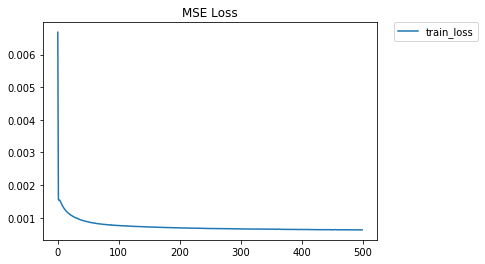

In [18]:
import matplotlib.pyplot as plt
plt.plot(train_losses,label='train_loss')
plt.title('MSE Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [50]:
preds = []
batch_size = 1

def Predictions():
    model.eval()
    for i in range(len(X)):
        pred = model(torch.from_numpy(X[i]).unsqueeze(0)).float()
        preds.append(pred.detach().numpy().item())

In [51]:
Predictions()

In [66]:
predictions = pd.DataFrame(preds)
predictions.index = data[3:].index

In [67]:
predictions

,0
Time,
2018-01-01 00:45:00,0.236042
2018-01-01 01:00:00,0.236042
2018-01-01 01:15:00,0.236042
2018-01-01 01:30:00,0.236042
2018-01-01 01:45:00,0.236042
...,...
2018-12-31 22:45:00,0.298252
2018-12-31 23:00:00,0.297140
2018-12-31 23:15:00,0.295123


In [73]:
predictions.to_csv('predictions_CNN.csv')

# Metrics

In [68]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [70]:
MSE_CNN = MSE(Y, predictions)
RMSE_CNN = MSE(Y, predictions)**(0.5)
MAE_CNN = MAE(Y, predictions)
MAPE_CNN = MAPE(Y, predictions)
R2_CNN = r2_score(Y, predictions)

In [71]:
Metric_CNN = {
    'MSE_CNN':MSE_CNN,
    'RMSE_CNN':RMSE_CNN,
    'MAE_CNN':MAE_CNN,
    'MAPE_CNN':MAPE_CNN,
    'R_Squared_CNN':R2_CNN
}

In [72]:
Metric_CNN

{'MSE_CNN': 0.000605432580241261,
 'RMSE_CNN': 0.02460553962507754,
 'MAE_CNN': 0.011346047667968939,
 'MAPE_CNN': 5.259139017322088,
 'R_Squared_CNN': 0.9603470071856154}